In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # input es un torch de 28x28
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 16 * 4 * 4 = 256
        #output 2 clases
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import kan

class CKAN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # input es un torch de 28x28
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 16 * 4 * 4 = 256
        #output 2 clases
        self.kan = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [33]:
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

# Transformaciones
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Cargar MNIST y filtrar por dos clases
mnist_train = MNIST(root='./data', train=True, download=True, transform=transform)
mnist_train.data = mnist_train.data[(mnist_train.targets == 0) | (mnist_train.targets == 1)]
mnist_train.targets = mnist_train.targets[(mnist_train.targets == 0) | (mnist_train.targets == 1)]

mnist_test = MNIST(root='./data', train=False, download=True, transform=transform)
mnist_test.data = mnist_test.data[(mnist_test.targets == 0) | (mnist_test.targets == 1)]
mnist_test.targets = mnist_test.targets[(mnist_test.targets == 0) | (mnist_test.targets == 1)]

# DataLoader
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=False)



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:05<00:00, 1694229.59it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 143286.84it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 846303.07it/s] 


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2272790.36it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



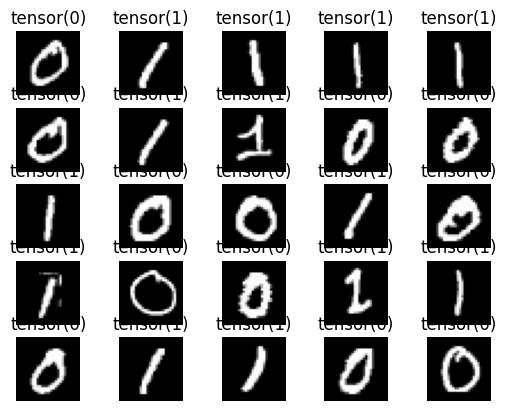

In [34]:
train_loader.dataset.data[0]
#plotear
import matplotlib.pyplot as plt
import numpy as np

def plot_images(images, labels):
    n_images = len(images)
    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure()
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i], cmap='gray')
        ax.set_title(labels[i])
        ax.axis('off')

    plt.show()

n_samples = 25
images = mnist_train.data[:n_samples]
labels = mnist_train.targets[:n_samples]

plot_images(images, labels)

In [35]:
import torch.optim as optim

net = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

images, labels = next(iter(train_loader))

# Entrenamiento del modelo
for epoch in range(10):  # número de épocas
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')



Epoch 1, Loss: 0.08959274739027023
Epoch 2, Loss: 0.0055634574964642525
Epoch 3, Loss: 0.002064246218651533
Epoch 4, Loss: 0.001252241781912744
Epoch 5, Loss: 0.0008981263963505626
Epoch 6, Loss: 0.0020393768791109324
Epoch 7, Loss: 0.007189929485321045
Epoch 8, Loss: 0.0027218032628297806
Epoch 9, Loss: 0.0012363205896690488
Epoch 10, Loss: 0.0008729096152819693


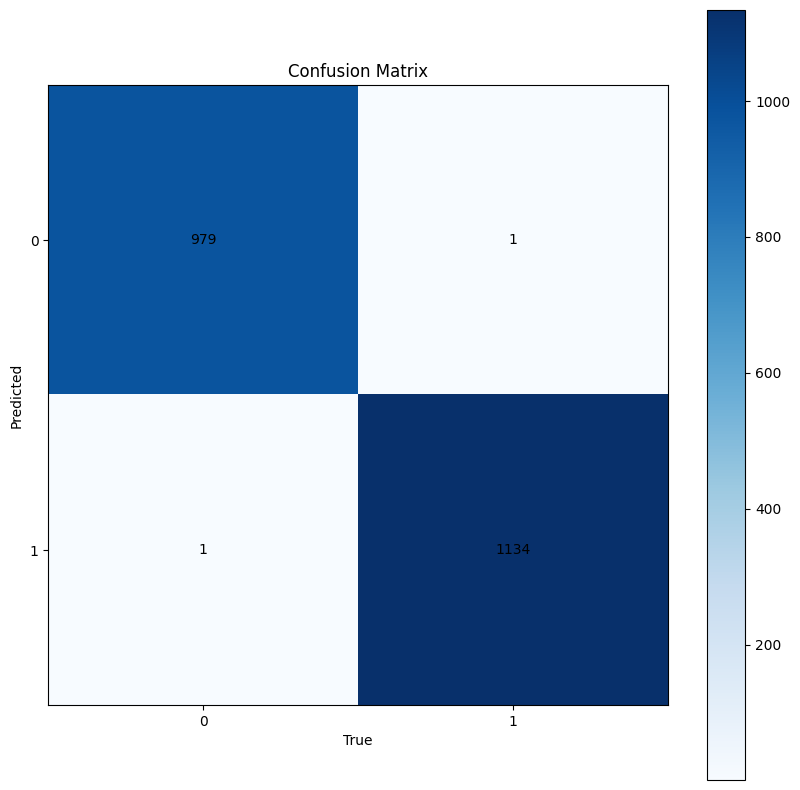

In [36]:
# dame el grafico de correlacion
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics

# Matriz de confusión
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true += labels.tolist()
        y_pred += predicted.tolist()

cm = metrics.confusion_matrix(y_true, y_pred)
# cantidad de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos
tn, fp, fn, tp = cm.ravel()

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.xticks(np.arange(2))
plt.yticks(np.arange(2))
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
